In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=2, n_classes=2)
# summarize the dataset

In [57]:
X = X[:,0:2]

In [58]:
X.shape

(100, 2)

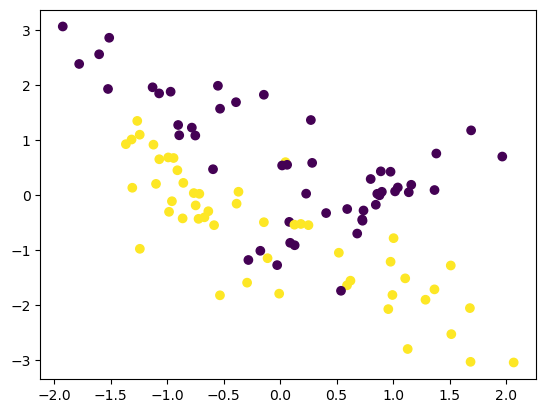

In [59]:
plt.scatter(X[:,0],X[:,1],c=y)

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.8800000000000001

In [62]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

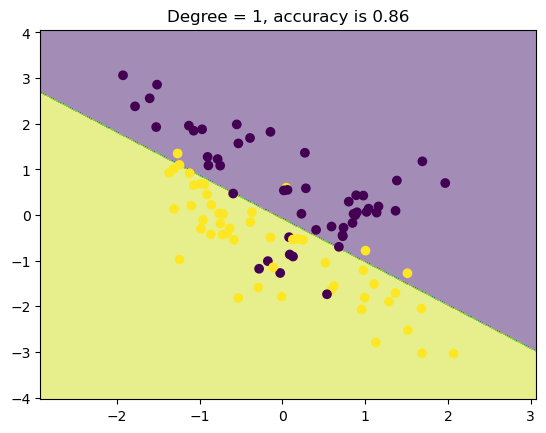

In [63]:
plot_decision_boundary(X,y)

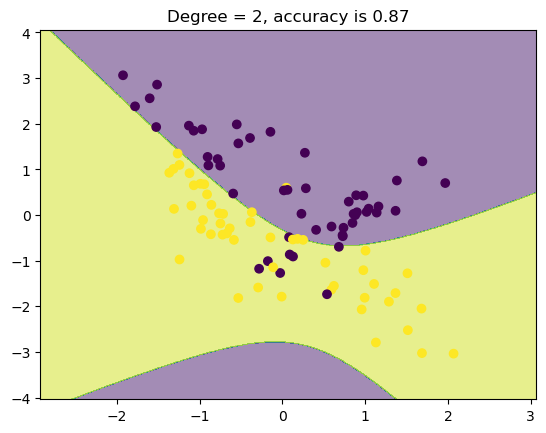

In [64]:
plot_decision_boundary(X,y,degree=2)

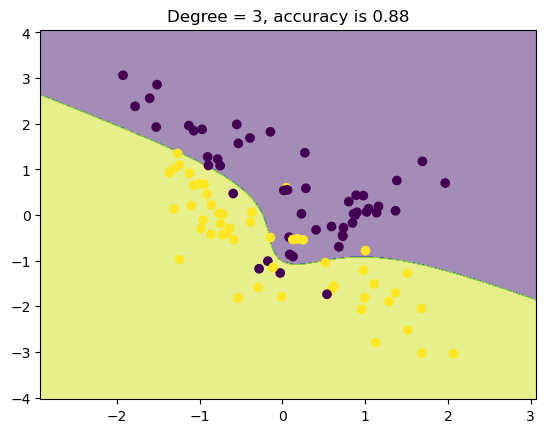

In [65]:
plot_decision_boundary(X,y,degree=3)